In [8]:
import pandas as pd
import time
from KNN import KNN
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

# Retrieve the data from CSVs

In [9]:
X_train = pd.read_csv('data/X_train.csv')
Y_train = pd.read_csv('data/Y_train.csv')
X_test = pd.read_csv('data/X_test.csv')
Y_test = pd.read_csv('data/Y_test.csv')

X_train_small = pd.read_csv('data/X_train_small.csv')
Y_train_small = pd.read_csv('data/Y_train_small.csv')
X_test_small = pd.read_csv('data/X_test_small.csv')
Y_test_small = pd.read_csv('data/Y_test_small.csv')

# KNN Classifier

In [10]:
parameters = {'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

knn = KNN()
GSCV = GridSearchCV(knn, parameters, cv=10, scoring='accuracy', verbose=100, n_jobs=-1)
GSCV.fit(X_train_small, Y_train_small.values.ravel())

print("Best Score: ", GSCV.best_score_)
print("Best Parameters: ", GSCV.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score:  0.9596
Best Parameters:  {'k': 3}


In [11]:
best_model = GSCV.best_estimator_
results = GSCV.cv_results_

results_df = pd.DataFrame(results)
results_df = results_df[['param_k', 'mean_test_score', 'rank_test_score']]
results_df = results_df.sort_values(by=['mean_test_score'], ascending=False)
results_df

,param_k,mean_test_score,rank_test_score
2,3,0.95960,1
0,1,0.95855,2
4,5,0.95850,3
3,4,0.95730,4
5,6,0.95675,5
6,7,0.95630,6
7,8,0.95530,7
8,9,0.95505,8
9,10,0.95435,9
1,2,0.95055,10


## Train the best model

In [12]:
start_time = time.time()
best_model.fit(X_train, Y_train.values.ravel())
end_time = time.time()

print(f"Execution time: {end_time - start_time:.5f} seconds")

Execution time: 0.18706 seconds


## Test the best model

In [13]:
start_time = time.time()
Y_test_pred = best_model.predict(X_test)
end_time = time.time()

print(f"Execution time: {end_time - start_time:.5f} seconds")
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_test, y_pred=Y_test_pred)))

Execution time: 17.54683 seconds
Accuracy: 0.974


## Confusion Matrix

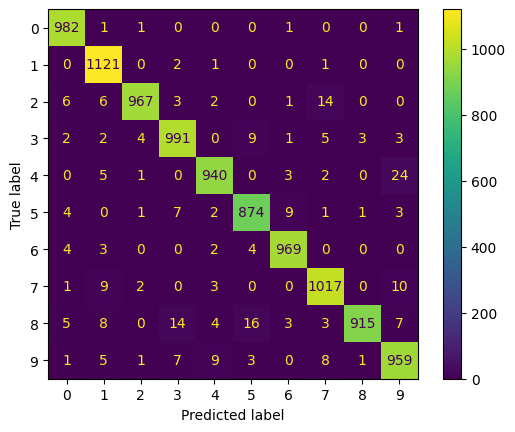

In [14]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_pred)